<a href="https://colab.research.google.com/github/Athrv10/House_Prediction_Regressor_Model/blob/main/Linear_Regression_House_prediction_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading The dataset
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data.LotArea

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


In [6]:
# as the above columns we are choosing 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'LotArea' from the dataset
X = data[['BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','LotArea']]

In [7]:
X

,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,LotArea
0,1,2,1,3,8450
1,0,2,0,3,9600
2,1,2,1,3,11250
3,1,1,0,3,9550
4,1,2,1,4,14260
...,...,...,...,...,...
1455,0,2,1,3,7917
1456,1,2,0,3,13175
1457,0,2,0,4,9042
1458,1,1,0,2,9717


In [8]:
y =data[['SalePrice']]

In [9]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [10]:
#spliting the dataset into the train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<Figure size 1500x1000 with 0 Axes>

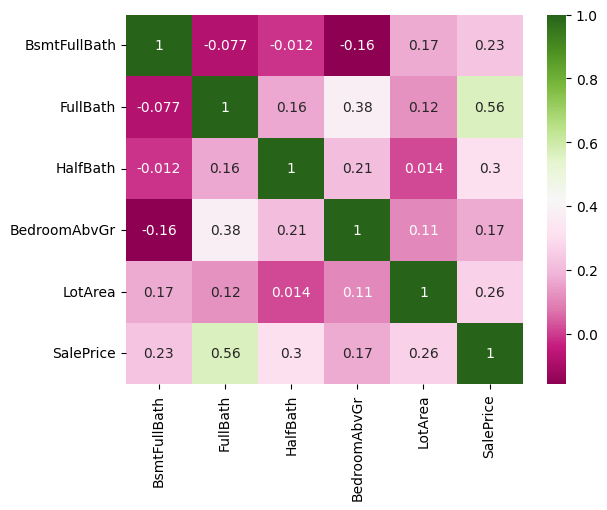

<Figure size 1500x1000 with 0 Axes>

In [11]:
#Finding the corrrelation between the total test dataset

data_train = X_train.join(y_train)

sns.heatmap(data_train.corr(), annot=True, cmap="PiYG")
plt.figure(figsize=(15,10))

In [12]:
y_train

,SalePrice
446,190000
508,161000
370,172400
1057,248000
477,380000
...,...
105,250000
277,141000
1071,154000
1393,163000


In [13]:
X_train

,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,LotArea
446,0,2,1,2,16492
508,0,2,0,3,9600
370,0,2,1,3,8121
1057,0,2,1,3,29959
477,0,2,1,3,13693
...,...,...,...,...,...
105,0,2,1,3,9375
277,0,1,0,2,19138
1071,0,1,1,4,11700
1393,0,2,0,3,10800


In [14]:
# creating a linear regression model for predicting he house prices

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

lr.predict(X_test)

array([[183940.88143751],
       [107448.90734318],
       [217872.61405031],
       [210690.86376405],
       [109471.15525406],
       [104211.75554984],
       [101778.59425067],
       [219989.51055063],
       [227267.90318404],
       [139928.27733942],
       [216688.8749473 ],
       [218435.88858256],
       [231820.90122076],
       [186825.18993787],
       [222666.53582052],
       [226703.47440069],
       [221301.57929628],
       [191479.18609179],
       [228137.05425533],
       [220007.66382362],
       [141491.13331621],
       [139725.12914746],
       [217806.50699367],
       [144558.08768318],
       [178181.63525476],
       [249533.62002326],
       [196282.65661519],
       [107828.02421696],
       [178017.09986483],
       [187327.45413759],
       [110167.16866175],
       [223215.6423491 ],
       [162526.99676506],
       [105734.21273846],
       [223257.51237895],
       [182502.51960324],
       [218095.06976635],
       [191777.09209219],
       [1517

In [15]:
y_test

,SalePrice
126,128000
479,89471
84,168500
504,147000
797,110000
...,...
872,116000
1233,142000
360,156000
444,210000


In [16]:
#Evaluating the prediction usimg meanabsolute error

from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_test, lr.predict(X_test))

40653.05822853534

In [17]:
#Scaling the X data using the StandardScaler Function\

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

In [18]:
lr_scaled = LinearRegression()

lr_scaled.fit(X_train1, y_train1)

pre = lr_scaled.predict(X_test1)

In [19]:
mean_absolute_error(y_test1,pre)

41786.65322449991

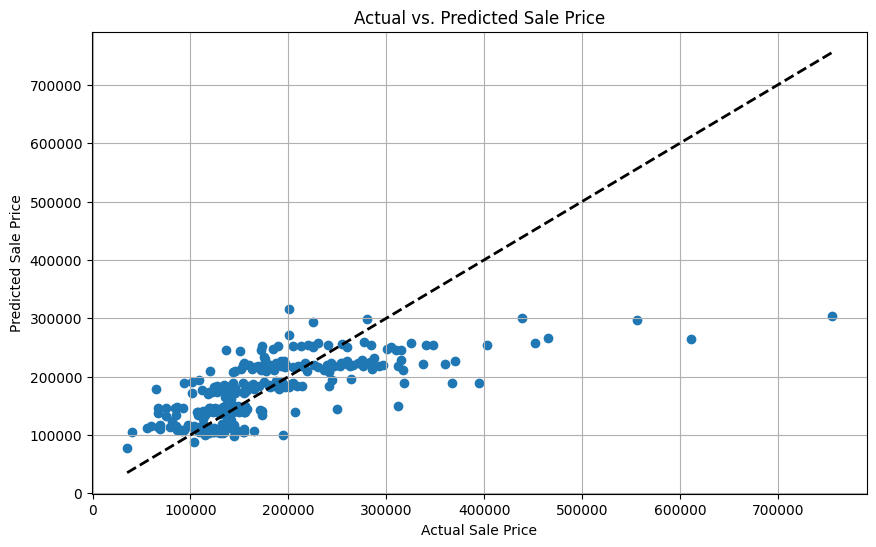

In [20]:
# prompt: create the scatterplot with the boundary line in it so that it look goog

# Assuming X_test1 and pre are already defined from the previous code.

plt.figure(figsize=(10, 6))
plt.scatter(y_test1, pre)  # Use y_test1 for the x-axis and pre for the y-axis
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=2) # Add a boundary line
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Price")
plt.grid(True)
plt.show()